In [34]:
import pandas as pd
import numpy as np
import sys
import os


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, KFold

from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import tree
from sklearn.feature_selection import chi2, SelectKBest, VarianceThreshold

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

plt.style.use("ggplot")
%matplotlib inline

In [35]:
sys.path.append("..")
from config_ML import DIABETES_DATA, RANDOM_SEED

In [36]:
diabetes_ds = pd.read_csv(DIABETES_DATA, sep=",")

In [38]:
diabetes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [39]:
diabetes_ds.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [41]:
diabetes_ds.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [42]:
diabetes_ds.rename(columns={'sudden weight loss': 'SuddenWeightLoss', 'Genital thrush': 'GenitalThrush', 
                            'visual blurring': 'VisualBlurring', 'delayed healing': 'DelayedHealing',
                            'partial paresis': 'PartialParesis' , 'muscle stiffness': 'MuscleStiffness',
                            'weakness': 'Weakness', 'class': 'y'}, inplace=True)

In [43]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
diabetes_ds['Gender'] = lb.fit_transform(diabetes_ds['Gender'])
diabetes_ds['Polyuria'] = lb.fit_transform(diabetes_ds['Polyuria'])
diabetes_ds['Polydipsia'] = lb.fit_transform(diabetes_ds['Polydipsia'])
diabetes_ds['SuddenWeightLoss'] = lb.fit_transform(diabetes_ds['SuddenWeightLoss'])
diabetes_ds['Weakness'] = lb.fit_transform(diabetes_ds['Weakness'])
diabetes_ds['Polyphagia'] = lb.fit_transform(diabetes_ds['Polyphagia'])
diabetes_ds['GenitalThrush'] = lb.fit_transform(diabetes_ds['GenitalThrush'])
diabetes_ds['VisualBlurring'] = lb.fit_transform(diabetes_ds['VisualBlurring'])
diabetes_ds['Itching'] = lb.fit_transform(diabetes_ds['Itching'])
diabetes_ds['Irritability'] = lb.fit_transform(diabetes_ds['Irritability'])
diabetes_ds['DelayedHealing'] = lb.fit_transform(diabetes_ds['DelayedHealing'])
diabetes_ds['PartialParesis'] = lb.fit_transform(diabetes_ds['PartialParesis'])
diabetes_ds['MuscleStiffness'] = lb.fit_transform(diabetes_ds['MuscleStiffness'])
diabetes_ds['Alopecia'] = lb.fit_transform(diabetes_ds['Alopecia'])
diabetes_ds['Obesity'] = lb.fit_transform(diabetes_ds['Obesity'])
diabetes_ds['y'] = lb.fit_transform(diabetes_ds['y'])
#diabetes_ds.y = diabetes_ds.y.astype(bool)

In [44]:
diabetes_ds.head()

,Age,Gender,Polyuria,Polydipsia,SuddenWeightLoss,Weakness,Polyphagia,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,y
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [45]:
diabetes_ds.shape

(520, 17)

In [46]:
diabetes_ds.info() #All numeric features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               520 non-null    int64
 1   Gender            520 non-null    int64
 2   Polyuria          520 non-null    int64
 3   Polydipsia        520 non-null    int64
 4   SuddenWeightLoss  520 non-null    int64
 5   Weakness          520 non-null    int64
 6   Polyphagia        520 non-null    int64
 7   GenitalThrush     520 non-null    int64
 8   VisualBlurring    520 non-null    int64
 9   Itching           520 non-null    int64
 10  Irritability      520 non-null    int64
 11  DelayedHealing    520 non-null    int64
 12  PartialParesis    520 non-null    int64
 13  MuscleStiffness   520 non-null    int64
 14  Alopecia          520 non-null    int64
 15  Obesity           520 non-null    int64
 16  y                 520 non-null    int64
dtypes: int64(17)
memory usage: 69.2 KB


In [47]:
diabetes_ds.isna().sum().sum() #No missing values

0

In [48]:
diabetes_ds.describe()

,Age,Gender,Polyuria,Polydipsia,SuddenWeightLoss,Weakness,Polyphagia,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,y
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Selection - Preprocessing

## Identify Highly Correlated Features

In [49]:
df_corr = diabetes_ds.drop("y", axis=1).corr().abs()

<AxesSubplot:>

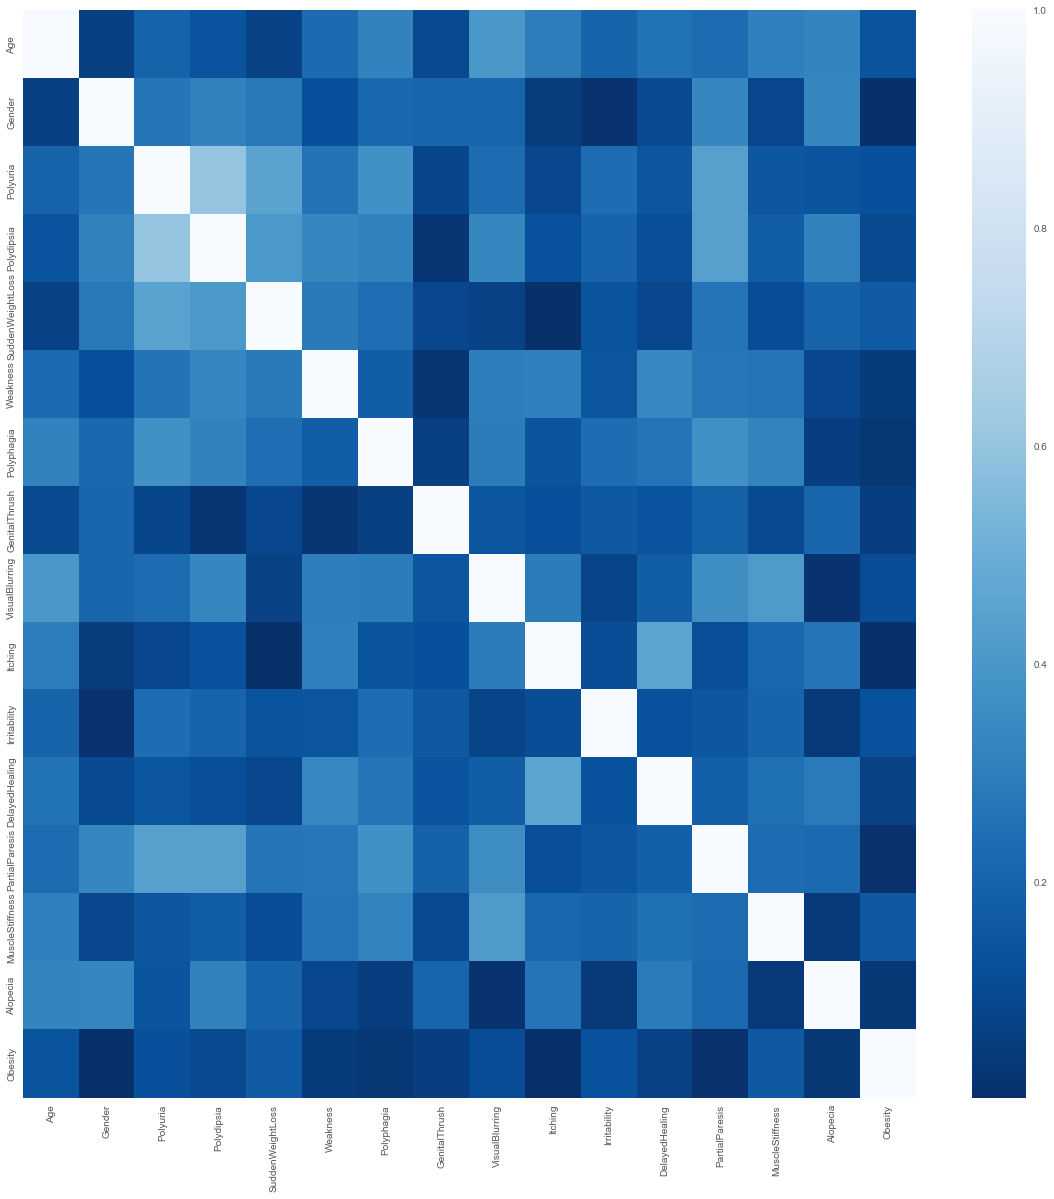

In [50]:
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(df_corr, cmap="Blues_r", ax=ax) # no strong correlation between variables so we can use all variable in the model

In [51]:
# Select upper triangle of correlation matrix
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.97
to_drop = [column for column in upper.columns if any(upper[column] > 0.97)]

In [52]:
to_drop # Nothing to drop

[]

## Data Exploration

## Defining model features 

In [53]:
df = diabetes_ds.copy()

### Select K-best

In [54]:
minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(df.drop("y", axis=1)) 
Y = df[["y"]]

In [55]:
kbest = SelectKBest(chi2, k="all").fit(X_scaled, Y)
scores = pd.DataFrame(kbest.scores_, index=df.drop("y",axis=1).columns, columns=["Feature_scores"])
scores.sort_values("Feature_scores", ascending = False, inplace=True)

In [56]:
scores.head(10)

,Feature_scores
Polydipsia,120.785515
Polyuria,116.184593
SuddenWeightLoss,57.749309
PartialParesis,55.314286
Gender,38.747637
Irritability,35.334127
Polyphagia,33.198418
Alopecia,24.402793
VisualBlurring,18.124571
Weakness,12.724262


### Defining model_features

In [57]:
1e-3

0.001

In [58]:
SCORE_THRESHOLD = 1e-3

In [59]:
model_features = scores.loc[scores.Feature_scores> SCORE_THRESHOLD].index

In [60]:
model_features

Index(['Polydipsia', 'Polyuria', 'SuddenWeightLoss', 'PartialParesis',
       'Gender', 'Irritability', 'Polyphagia', 'Alopecia', 'VisualBlurring',
       'Weakness', 'GenitalThrush', 'MuscleStiffness', 'Obesity',
       'DelayedHealing', 'Age', 'Itching'],
      dtype='object')

# Shuffule split of data

In [61]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=RANDOM_SEED)
for train_index, test_index in split.split(df, df.y):
    df_train = df.iloc[train_index, :].copy()
    df_test = df.iloc[test_index, :].copy()

In [62]:
X_train = df_train.drop("y", axis=1).copy()
X_test = df_test.drop("y", axis=1).copy()

Y_train = df_train.y.ravel()
Y_test = df_test.y.ravel()

X = df.drop("y", axis=1).copy()
Y = df.y.ravel()

# Classifiers

In [63]:
def classifier_model(model, model_features, X_train, X_test, y_train, y_test):
    X_train = X_train[model_features]
    X_test = X_test[model_features]
    class_model = model
    class_model.fit(X_train, y_train)

    print("Classification Report on Train")
    print(classification_report(y_train, class_model.predict(X_train)))
    print(" ")
    print("Confusion Matrix on Train")
    cm = ConfusionMatrix(class_model, classes=["No_diabetes_ds", "diabetes_ds"],\
                         cmap="Blues", fontsize=13)
    cm.score(X_train, y_train)
    cm.show()
    
    print("Classification Report on Test")
    print(classification_report(y_test, class_model.predict(X_test)))
    print(" ")
    print("Confusion Matrix on Test")
    cm = ConfusionMatrix(class_model, classes=["No_diabetes_ds", "diabetes_ds"],\
                         cmap="Blues", fontsize=13)
    cm.score(X_test, y_test)
    cm.show()
    
    
    print("Classification Report on Entire Dataset")
    print(classification_report(y_test, class_model.predict(X_test)))
    print(" ")
    print("Confusion Matrix on Entire Dataset")
    cm = ConfusionMatrix(class_model, classes=["No_diabetes_ds", "diabetes_ds"],\
                         cmap="Blues", fontsize=13)
    cm.score(X_train.append(X_test), np.append(y_train, y_test))
    cm.show()

    return class_model


def plot_feat_imp(tree, features):
    feat_importance = pd.DataFrame(
        tree.feature_importances_, index=features, columns=["importance"]
    ).sort_values("importance")

    feat_importance = feat_importance.loc[feat_importance.values >0.01]

    fig, ax = plt.subplots(figsize=(6, 8))
    feat_importance.plot(kind="barh", ax=ax, color="midnightblue")

## Random Forest Classifier

Classification Report on Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       214

    accuracy                           1.00       348
   macro avg       1.00      1.00      1.00       348
weighted avg       1.00      1.00      1.00       348

 
Confusion Matrix on Train


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



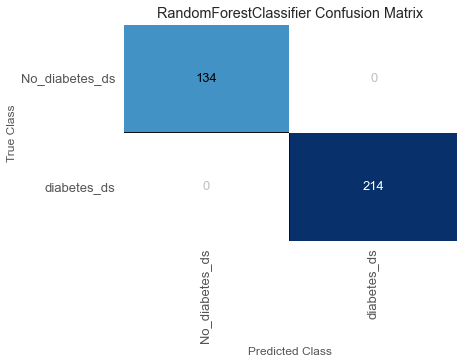

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



Classification Report on Test
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        66
           1       0.99      0.95      0.97       106

    accuracy                           0.97       172
   macro avg       0.96      0.97      0.96       172
weighted avg       0.97      0.97      0.97       172

 
Confusion Matrix on Test


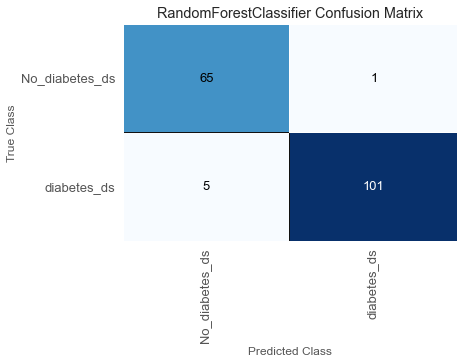

Classification Report on Entire Dataset
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        66
           1       0.99      0.95      0.97       106

    accuracy                           0.97       172
   macro avg       0.96      0.97      0.96       172
weighted avg       0.97      0.97      0.97       172

 
Confusion Matrix on Entire Dataset


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



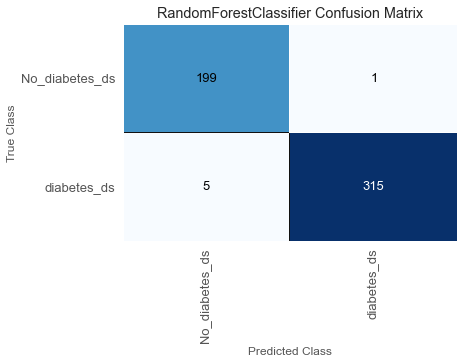

In [65]:
cls_rf = classifier_model(RandomForestClassifier(n_estimators=60, random_state=RANDOM_SEED), model_features, X_train, X_test, Y_train, Y_test)

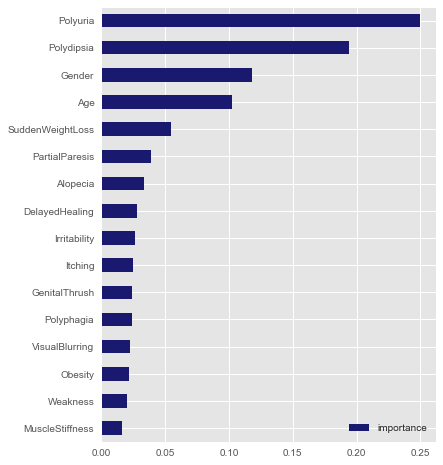

In [66]:
plot_feat_imp(cls_rf, model_features)

## SVC

### Scaling 

In [67]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)



Classification Report on Train
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       134
           1       0.98      1.00      0.99       214

    accuracy                           0.98       348
   macro avg       0.98      0.98      0.98       348
weighted avg       0.98      0.98      0.98       348

 
Confusion Matrix on Train


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



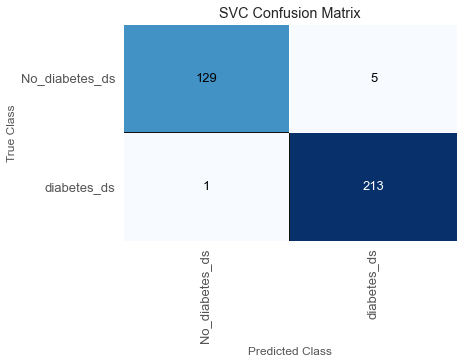

Classification Report on Test
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        66
           1       0.98      0.93      0.96       106

    accuracy                           0.95       172
   macro avg       0.94      0.95      0.95       172
weighted avg       0.95      0.95      0.95       172

 
Confusion Matrix on Test


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



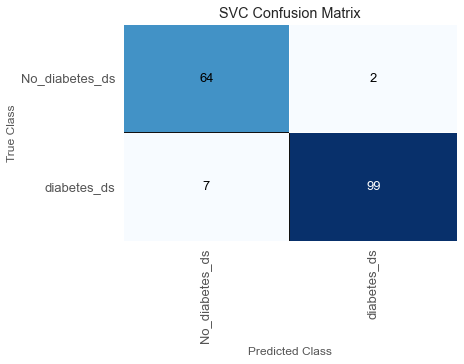

Classification Report on Entire Dataset
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        66
           1       0.98      0.93      0.96       106

    accuracy                           0.95       172
   macro avg       0.94      0.95      0.95       172
weighted avg       0.95      0.95      0.95       172

 
Confusion Matrix on Entire Dataset


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



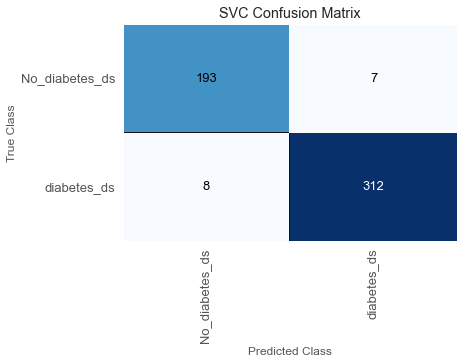

In [69]:
cls_svc = classifier_model(SVC(random_state=RANDOM_SEED), model_features, X_train_scaled, X_test_scaled, Y_train, Y_test)

## Gradient Boosting Classifier

Classification Report on Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       214

    accuracy                           1.00       348
   macro avg       1.00      1.00      1.00       348
weighted avg       1.00      1.00      1.00       348

 
Confusion Matrix on Train


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



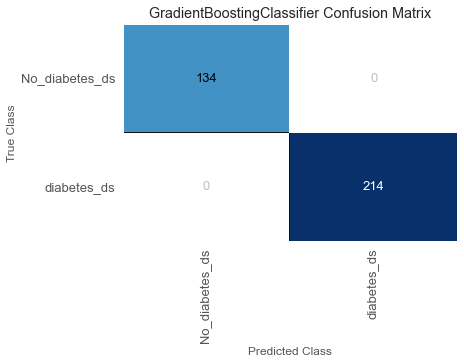

Classification Report on Test
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.99      0.96      0.98       106

    accuracy                           0.97       172
   macro avg       0.97      0.97      0.97       172
weighted avg       0.97      0.97      0.97       172

 
Confusion Matrix on Test


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



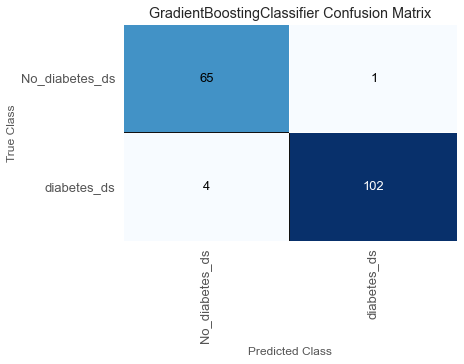

Classification Report on Entire Dataset
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.99      0.96      0.98       106

    accuracy                           0.97       172
   macro avg       0.97      0.97      0.97       172
weighted avg       0.97      0.97      0.97       172

 
Confusion Matrix on Entire Dataset


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



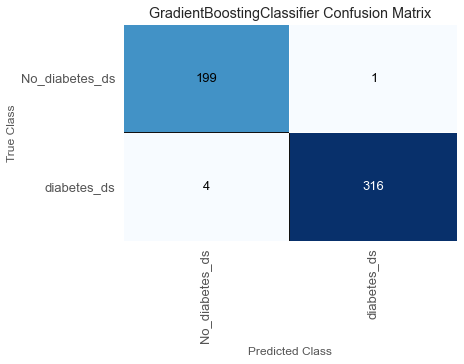

GradientBoostingClassifier(n_estimators=150, random_state=42)

In [70]:
cls_gb = classifier_model(GradientBoostingClassifier(n_estimators=150, random_state=RANDOM_SEED), model_features, X_train, X_test, Y_train, Y_test)
cls_gb